In [19]:
from qiskit import *
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.circuit.library import InnerProduct
from numpy.random import randint
import numpy as np
from math import pi

In [9]:
def callBellPair(circuit, h_qubit, x_qubit):
    circuit.h(h_qubit)
    circuit.cx(h_qubit, x_qubit)
    
    return circuit
    
def callInvBellPair(circuit, h_qubit, x_qubit):
    circuit.cx(h_qubit, x_qubit)
    circuit.h(h_qubit)
    
    return circuit
    
def measureSend(circuit, a, b):
    circuit.measure(a, 0)
    circuit.measure(b, 1)
    
    return circuit

def bobGates(circuit, qubit, cz, cx):
    circuit.x(qubit).c_if(cx, 1)
    circuit.z(qubit).c_if(cz, 1)
    
    return circuit

def encodeMsg(circuit, qubit, msg):
    if len(msg) > 2:
        raise ValueError(f"message '{msg}' is invalid")
    
    if msg[0] == 1:
        circuit.z(q[qubit])
    
    if msg[1] == 1:
        circuit.x(q[qubit])
        
    circuit.id(q[qubit])
        
    return circuit

In [26]:
q = QuantumRegister(4)
cz = ClassicalRegister(1)
cx = ClassicalRegister(1)
c = ClassicalRegister(1)
circuit = QuantumCircuit(q, cz, cx, c)

circuit.rx(pi/2, q[0])
circuit.ry(pi/4, q[0])
# circuit.x(q[0])
circuit = callBellPair(circuit, 2, 1)

circuit.id(q[3]) # Perfect initial state for fourth qubit 
circuit.barrier()

circuit = callInvBellPair(circuit, 0, 1)
circuit.barrier()
circuit = measureSend(circuit, 0, 1)
circuit.barrier()
circuit = bobGates(circuit, 2, cz, cx)
circuit.barrier()

circuit.cz(q[3], q[2])
# circuit.x(q[2])
# circuit.measure(q[2], c)

circuit.draw()

┌─────────┐┌─────────┐ ░      ┌───┐ ░ ┌─┐    ░                ░    
q144_0: ┤ Rx(π/2) ├┤ Ry(π/4) ├─░───■──┤ H ├─░─┤M├────░────────────────░────
        └─────────┘└──┬───┬──┘ ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░                ░    
q144_1: ──────────────┤ X ├────░─┤ X ├──────░──╫─┤M├─░────────────────░────
           ┌───┐      └─┬─┘    ░ └───┘      ░  ║ └╥┘ ░  ┌───┐  ┌───┐  ░    
q144_2: ───┤ H ├────────■──────░────────────░──╫──╫──░──┤ X ├──┤ Z ├──░──■─
           ├───┤               ░            ░  ║  ║  ░  └─╥─┘  └─╥─┘  ░  │ 
q144_3: ───┤ I ├───────────────░────────────░──╫──╫──░────╫──────╫────░──■─
           └───┘               ░            ░  ║  ║  ░    ║   ┌──╨──┐ ░    
 c45: 1/═══════════════════════════════════════╩══╬═══════╬═══╡ = 1 ╞══════
                                               0  ║    ┌──╨──┐└─────┘      
 c46: 1/══════════════════════════════════════════╩════╡ = 1 ╞═════════════
                                                  0    └─────┘             
 c47: 1/═══════════════════════════════════════════════════════════════════

[ 0.        +0.j          0.65328148+0.27059805j  0.        +0.j
 -0.        +0.j         -0.        +0.j          0.27059805-0.65328148j
 -0.        +0.j         -0.        +0.j          0.        +0.j
  0.        +0.j          0.        +0.j          0.        +0.j
  0.        -0.j          0.        -0.j          0.        -0.j
  0.        -0.j        ]


C:\Users\wei\anaconda3\envs\IBMQ\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


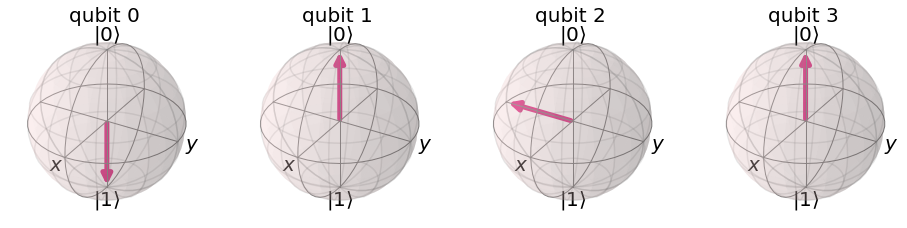

In [27]:
simulator = Aer.get_backend('statevector_simulator')
job = execute(circuit, simulator)
result = job.result()
statevector = result.get_statevector()
print(statevector)
plot_bloch_multivector(statevector)

{'0 0 0': 143, '1 0 1': 125, '1 1 1': 135, '0 1 0': 131, '1 1 0': 131, '1 0 0': 120, '0 0 1': 137, '0 1 1': 102}


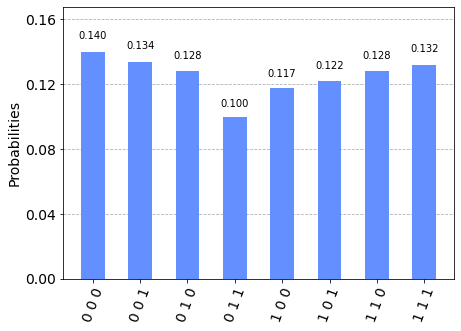

In [5]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)